In [24]:
# # Kaggle library
# !pip install kaggle
# # Dataset download
# !kaggle datasets download -d olistbr/brazilian-ecommerce

In [69]:
# Zip file ko extract
import zipfile
with zipfile.ZipFile("brazilian-ecommerce.zip", "r") as zip_ref:
    zip_ref.extractall("olist_data")
print("Data Is Downloaded and extract")

# Business Problem : The Olist E-commerce platform is experiencing delivery delays and a messy payment system.
                    # We need to clean the data and identify where the problems are occurring.

# import all necessary libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

# Dataset load
orders = pd.read_csv('olist_data/olist_orders_dataset.csv')
payments = pd.read_csv('olist_data/olist_order_payments_dataset.csv')

# Merge Data set
df = pd.merge(orders, payments, on="order_id")

print("Sucessfully Merge")
df.head()


Data Is Downloaded and extract
Sucessfully Merge


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12


In [70]:
# Checking Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       103886 non-null  object 
 1   customer_id                    103886 non-null  object 
 2   order_status                   103886 non-null  object 
 3   order_purchase_timestamp       103886 non-null  object 
 4   order_approved_at              103711 non-null  object 
 5   order_delivered_carrier_date   101998 non-null  object 
 6   order_delivered_customer_date  100754 non-null  object 
 7   order_estimated_delivery_date  103886 non-null  object 
 8   payment_sequential             103886 non-null  int64  
 9   payment_type                   103886 non-null  object 
 10  payment_installments           103886 non-null  int64  
 11  payment_value                  103886 non-null  float64
dtypes: float64(1), int64(2), objec

In [71]:
# Convert String into Date
date_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for col in date_columns:
    df[col] = pd.to_datetime(df[col])

print(df.dtypes)

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
payment_sequential                        int64
payment_type                             object
payment_installments                      int64
payment_value                           float64
dtype: object


In [72]:
# Handling Missing Values
print(df.isnull().sum())

# Because we only focus on delivered orders 
df_clean = df.dropna(subset=['order_delivered_customer_date'])
print("Sucessfully Drop missing value in order_delivered_customer_date")
print(df_clean.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 175
order_delivered_carrier_date     1888
order_delivered_customer_date    3132
order_estimated_delivery_date       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
dtype: int64
Sucessfully Drop missing value in order_delivered_customer_date
order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      1
order_delivered_customer_date     0
order_estimated_delivery_date     0
payment_sequential                0
payment_type                      0
payment_installments              0
payment_value                     0
dtype: int64


In [73]:
# How Many Days in Delivery
df_clean['delivery_days'] = (df_clean['order_delivered_customer_date'] - df_clean['order_purchase_timestamp']).dt.days

print(f"Average Delivery Time : {df_clean['delivery_days'].mean():.2f}")

Average Delivery Time : 12.11


C:\Users\Keshav\AppData\Local\Temp\ipykernel_19816\1072627693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['delivery_days'] = (df_clean['order_delivered_customer_date'] - df_clean['order_purchase_timestamp']).dt.days


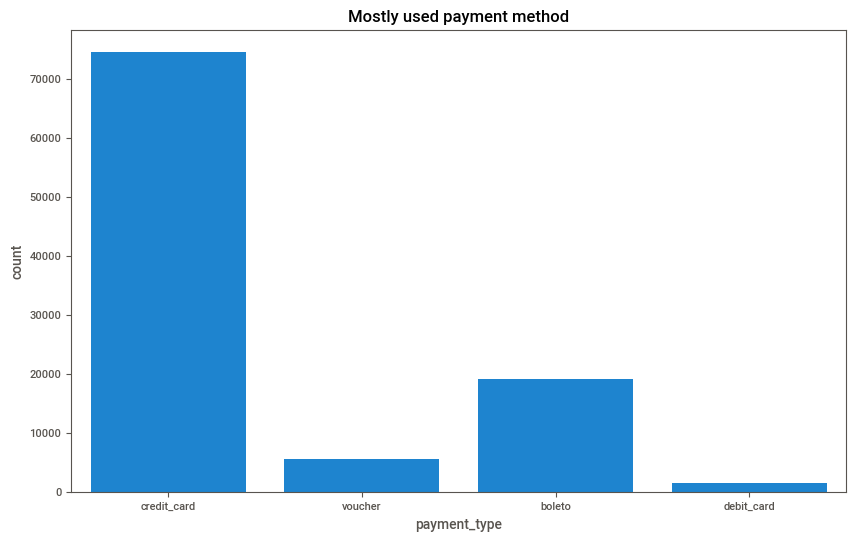

In [74]:
# Payment Methods Overviews 
plt.figure(figsize=(10,6))
sns.countplot(data=df_clean, x='payment_type')
plt.title('Mostly used payment method')
plt.show()

In [75]:
# OUTLIER DETECTION 

In [76]:
# OUTLIER HANDLING
# checking if there is delivery is less than 0 or more then 100
outlier = df_clean[(df_clean['delivery_days'] < 0) | df_clean['delivery_days'] > 100]
print(f"Bad Record Count : {len(outlier)}")

# remove 
df_final = df_clean[(df_clean['delivery_days'] >= 0 ) & (df_clean['delivery_days'] <= 100)]

Bad Record Count : 0


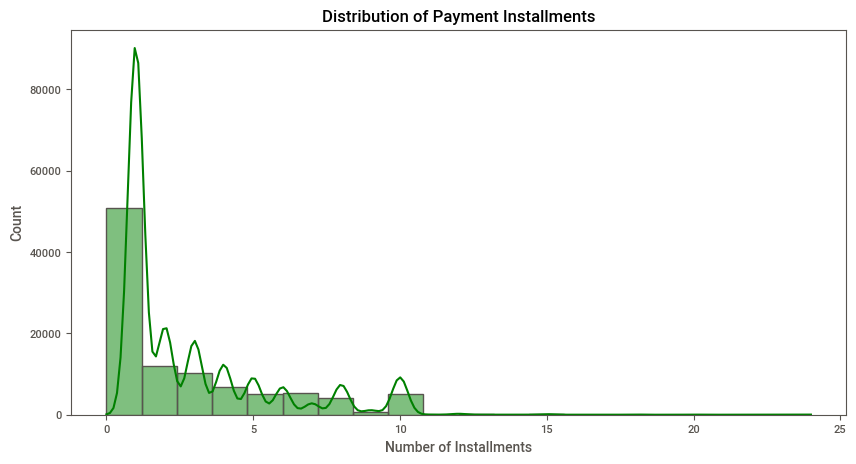

In [77]:
plt.figure(figsize=(10,5))
sns.histplot(df_final['payment_installments'], bins=20, kde=True, color='green')
plt.title('Distribution of Payment Installments')
plt.xlabel('Number of Installments')
plt.show()

In [78]:
# TIME SERIES ANALYSIS

C:\Users\Keshav\AppData\Local\Temp\ipykernel_19816\97487516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['order_month'] = df_final['order_purchase_timestamp'].dt.to_period('M')


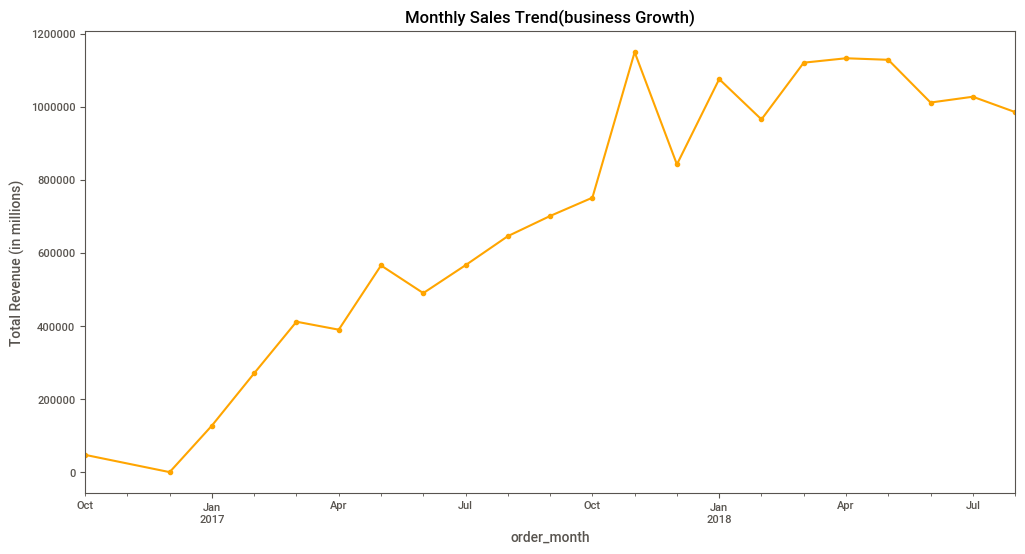

In [79]:
# Month Extract
df_final['order_month'] = df_final['order_purchase_timestamp'].dt.to_period('M')

# calculate monthly sales
monthly_sales = df_final.groupby('order_month')['payment_value'].sum()

monthly_sales.plot(kind = 'line', figsize=(12,6), marker='o', color='orange')
plt.title('Monthly Sales Trend(business Growth)')
plt.ylabel('Total Revenue (in millions)')
plt.show()

In [80]:
# PRODUCT LEVEL ANALYSIS

  product_category_name_english  payment_value
0         computers_accessories    31710651.28
1                          auto    20417964.73
2               furniture_decor    15862007.74
3              office_furniture    12481694.00
4                    housewares    11193180.06
5                  garden_tools    10987246.48
6                bed_bath_table     9938539.26
7               fixed_telephony     7791525.92
8                 health_beauty     6467806.45
9                 watches_gifts     5582715.91


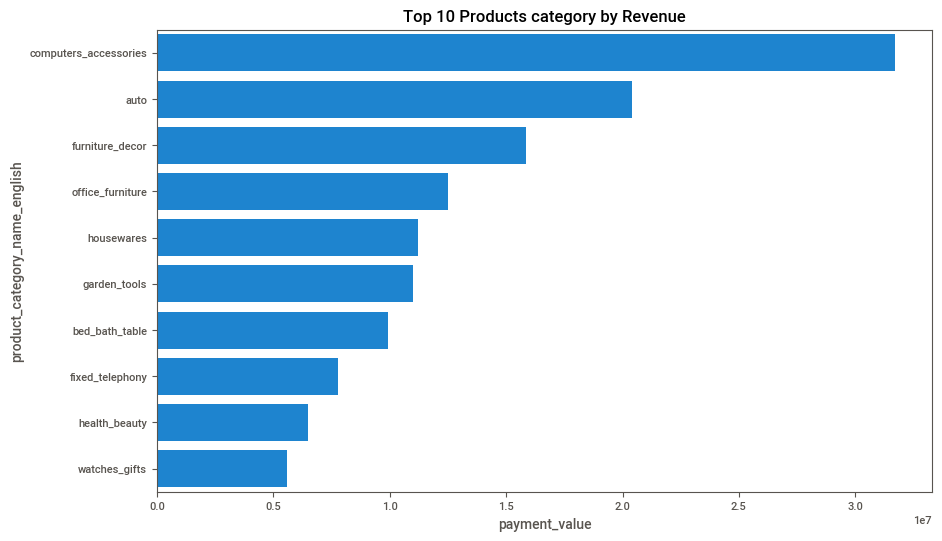

In [88]:
# Product category 
products = pd.read_csv('olist_data/olist_products_dataset.csv')
translation = pd.read_csv('olist_data/product_category_name_translation.csv') 
items = pd.read_csv('olist_data/olist_order_items_dataset.csv')

# Merge SE English names 
df_final = pd.merge(df_final, items, on='order_id')
df_final = pd.merge(df_final, products, on='product_id')
df_final = pd.merge(df_final, translation, on='product_category_name')

# Top 10 categories by Revenue
top_cat = df_final.groupby('product_category_name_english')['payment_value'].sum().sort_values(ascending=False).head(10).reset_index()
print(top_cat)

# CHart
plt.figure(figsize=(10,6))
sns.barplot(data=top_cat, x='payment_value', y='product_category_name_english')
plt.title('Top 10 Products category by Revenue')
plt.show()

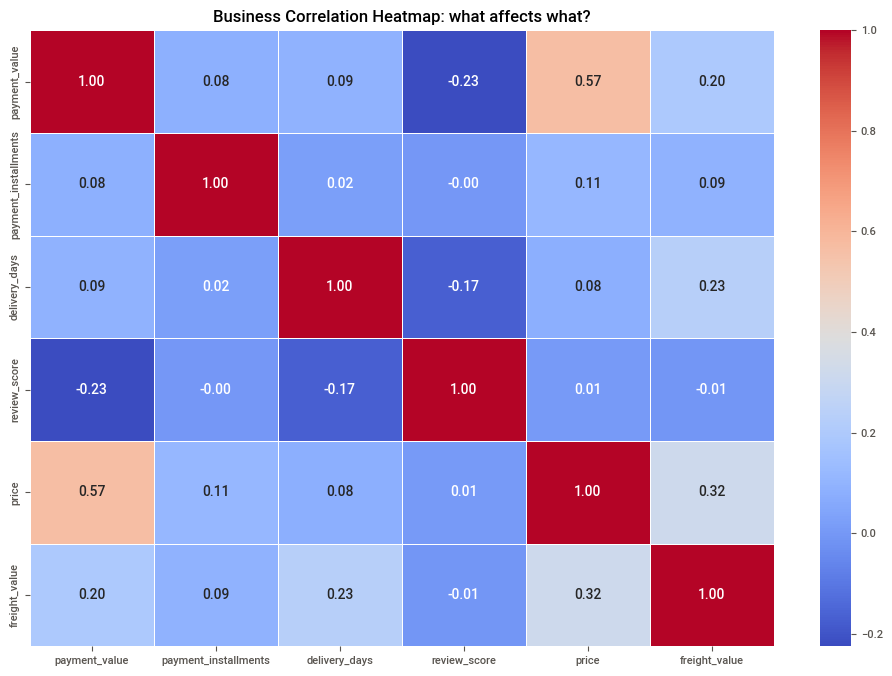

In [89]:
reviews = pd.read_csv('olist_data/olist_order_reviews_dataset.csv')
items = pd.read_csv('olist_data/olist_order_items_dataset.csv')

# df_heat = pd.merge(df_final, reviews[['order_id', 'review_score']], on='order_id')
# df_heat = pd.merge(df_heat, items[['order_id', 'price', 'freight_value']], on='order_id')

number_cols = df_heat[['payment_value', 'payment_installments', 'delivery_days', 'review_score', 'price', 'freight_value']]

# CORRELATION
corr_matrix = number_cols.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm', fmt=".2f", linewidth=0.5)
plt.title('Business Correlation Heatmap: what affects what?')
plt.show()

In [68]:
# !pip install sweetviz 
import numpy as np
if not hasattr(np, 'VisibleDeprecationWarning'):
    np.VisibleDeprecationWarning = type('VisibleDeprecationWarning', (DeprecationWarning,), {})

import sweetviz as sv
# Ab apna sweetviz wala code run karo
report = sv.analyze(df_final)
report.show_html('Final_Report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Final_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
